In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np

# lib untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

# lib praproses data
from sklearn.preprocessing import MinMaxScaler

In [2]:
# load dataset
dataset = pd.read_csv("dataset/dataset_enso.csv", parse_dates=["acq_date"])
dataset = dataset[["acq_date", "hotspot", "sst_anom", "oni_anom", "soi_anom"]]

In [3]:
# set index Date
dataset = dataset.set_index("acq_date")

In [4]:
# normalize features
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(np.array(dataset))

In [5]:
# convert numpy array to dataframe
scaled = pd.DataFrame(scaled, columns=["hotspot", "sst_anom", "oni_anom", "soi_anom"])
print(scaled.head())

    hotspot  sst_anom  oni_anom  soi_anom
0 -1.000000 -0.614849 -0.551402      0.36
1 -0.999723 -0.522042 -0.476636      0.60
2 -0.999030 -0.433875 -0.439252      0.34
3 -0.997644 -0.522042 -0.392523      0.10
4 -0.995012 -0.475638 -0.350467     -0.12


### Scatter Plot

In [6]:
# function scatter plot
def scatter(data, x, y, title):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  sns.scatterplot(data=data, x=x, y=y)

  # set labels
  ax.set_title(title, fontsize=12)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

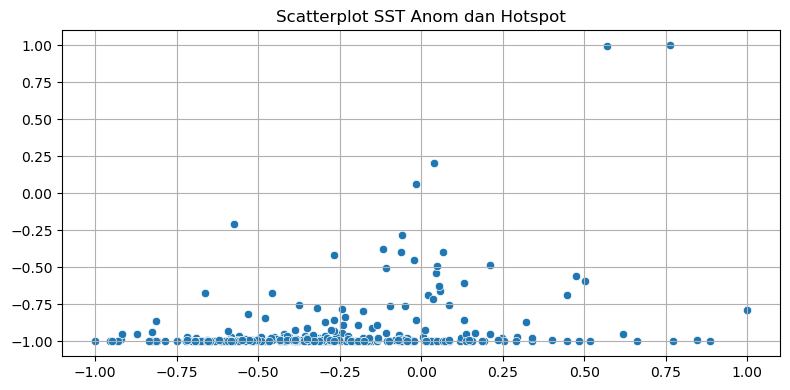

In [7]:
# SST Nino 3.4 dan hotspot
scatter(
  data=scaled, x="sst_anom", y="hotspot", title="Scatterplot SST Anom dan Hotspot"
)

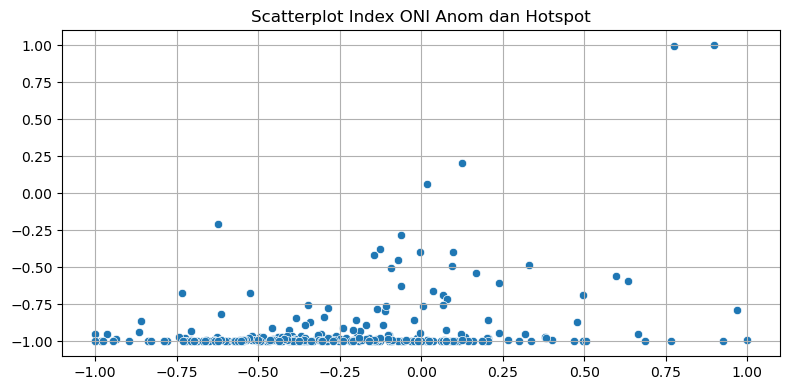

In [8]:
# Index ONI dan hotspot
scatter(
  data=scaled, x="oni_anom", y="hotspot", title="Scatterplot Index ONI Anom dan Hotspot"
)

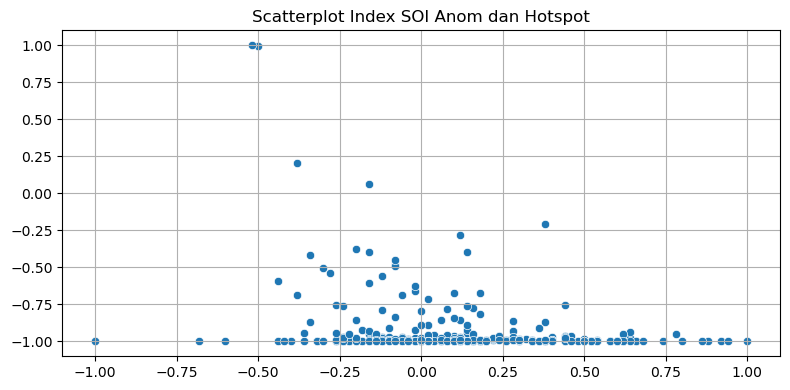

In [9]:
# Index SOI dan hotspot
scatter(
  data=scaled, x="soi_anom", y="hotspot", title="Scatterplot Index SOI Anom dan Hotspot"
)

### Heatmap Correlations

In [10]:
def heatmap(data, title):
  # create heatmap corr
  fig, ax = plt.subplots(figsize=(8,4))
  sns.heatmap(data=data, vmin=-1, vmax=1,cmap="viridis", annot=True, fmt=".3f", linewidths=1)

  # set labels
  ax.set_title(title, fontsize=12)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(False)

  # show plot
  plt.tight_layout()
  plt.show()

In [11]:
# corr kendall
kendall = scaled.corr(method="kendall")

# corr spearman
spearman = scaled.corr(method="spearman")

# corr pearson
pearson = scaled.corr(method="pearson")

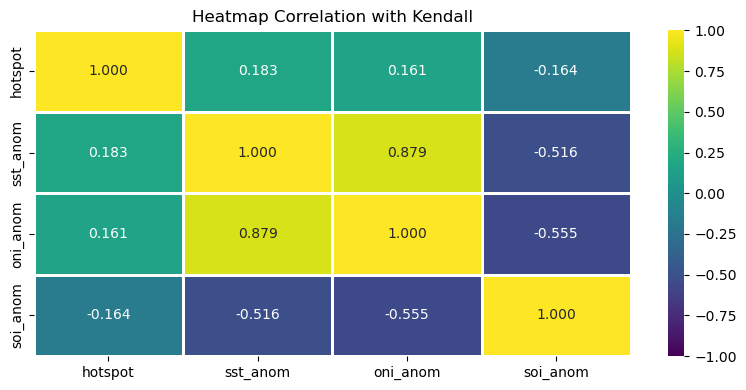

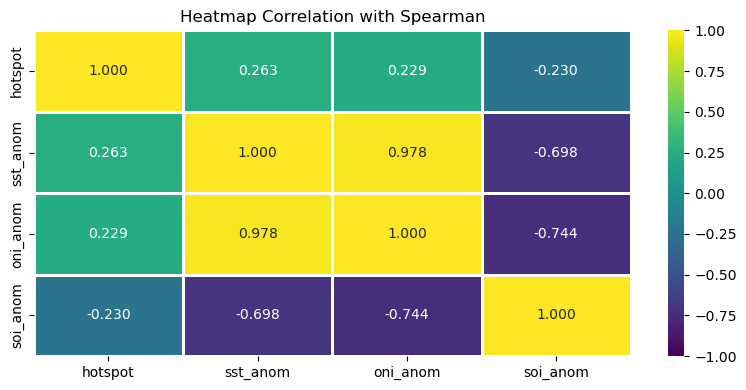

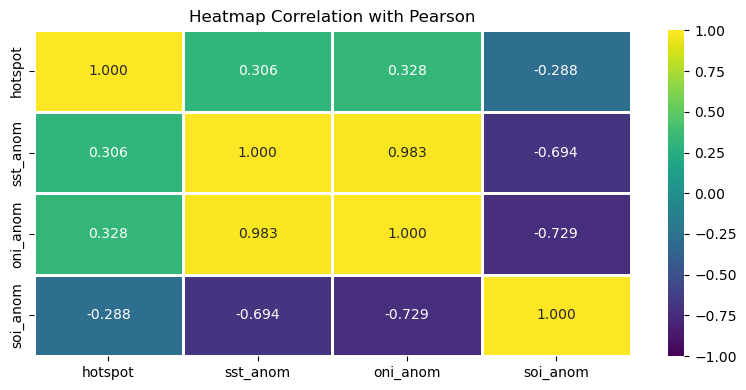

In [12]:
# call func heatmap
heatmap(kendall, "Heatmap Correlation with Kendall")
heatmap(spearman, "Heatmap Correlation with Spearman")
heatmap(pearson, "Heatmap Correlation with Pearson")

### Boxplot

In [13]:
def detect_outlier(data):
  # Menghitung Q1 (kuartil pertama) dan Q3 (kuartil ketiga)
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)

  # Menghitung IQR
  IQR = Q3 - Q1

  # Menentukan batas atas dan bawah
  batas_atas = Q3 + 1.5 * IQR
  batas_bawah = Q1 - 1.5 * IQR

  # Menghitung jumlah pencilan
  outlier = (data < batas_bawah) | (data > batas_atas)
  jumlah_outlier = outlier.sum()

  # Menghitung persentase pencilan
  persentase_outlier = (jumlah_outlier / len(data)) * 100

  # return values
  return persentase_outlier

In [14]:
# Persentase Outlier
print(f"Outlier hotspot : {detect_outlier(dataset['hotspot']):.2f}%")
print(f"Outlier sst     : {detect_outlier(dataset['sst_anom']):.2f}%")
print(f"Outlier oni     : {detect_outlier(dataset['oni_anom']):.2f}%")
print(f"Outlier soi     : {detect_outlier(dataset['soi_anom']):.2f}%")

Outlier hotspot : 17.03%
Outlier sst     : 1.81%
Outlier oni     : 2.17%
Outlier soi     : 1.81%


In [15]:
def boxplot(data, labels, title):
  # define boxplot
  fig, ax = plt.subplots(figsize=(8,4))
  ax.boxplot(x=data, labels=labels, widths=(0.75, 0.75, 0.75, 0.75), patch_artist=True)

  # set labels
  ax.set_title(title)
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.grid(True)

  # show boxplot
  plt.tight_layout()
  plt.show()

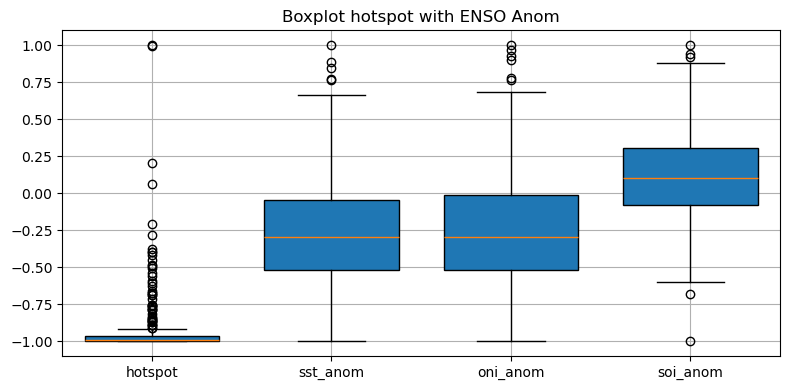

In [16]:
boxplot(
  data=scaled[["hotspot", "sst_anom", "oni_anom", "soi_anom"]],
  labels=["hotspot", "sst_anom", "oni_anom", "soi_anom"],
  title="Boxplot hotspot with ENSO Anom"
)

### Histogram

In [17]:
# function histogram,
def histogram(data, x, title):
  
  # create scatter plots
  fig, ax = plt.subplots(figsize = (8,4))
  #sns.kdeplot(data=data, x=x, fill=True, ax=ax)
  sns.histplot(data=data, x=x, kde=True, bins=15)

  # set labels
  ax.set_title(title, fontsize=12)
  ax.set_xlabel("", fontsize=12)
  ax.set_ylabel("", fontsize=12)
  ax.grid(True)
  
  # return values
  plt.tight_layout()
  plt.show()

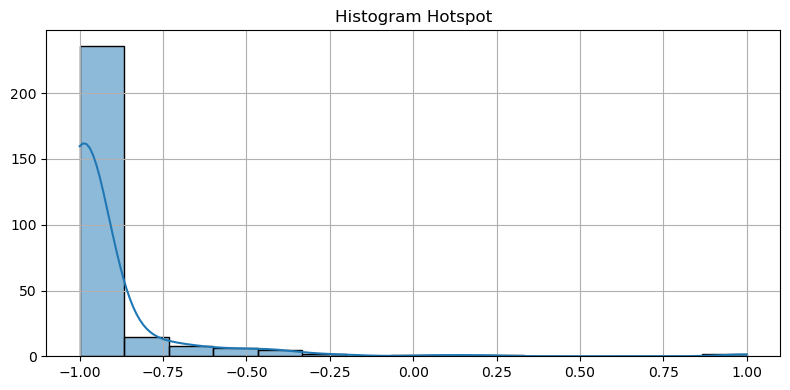

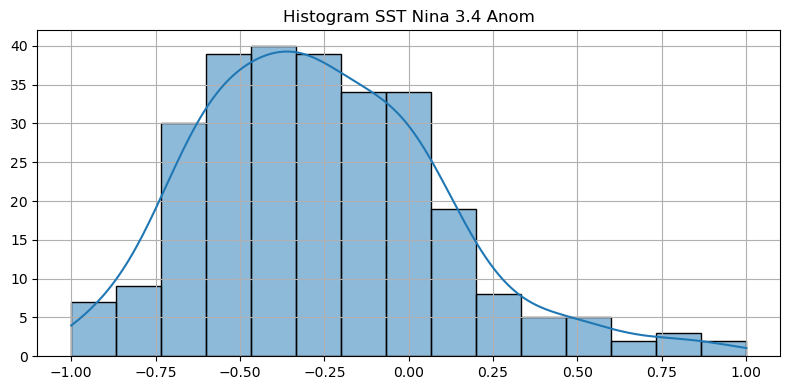

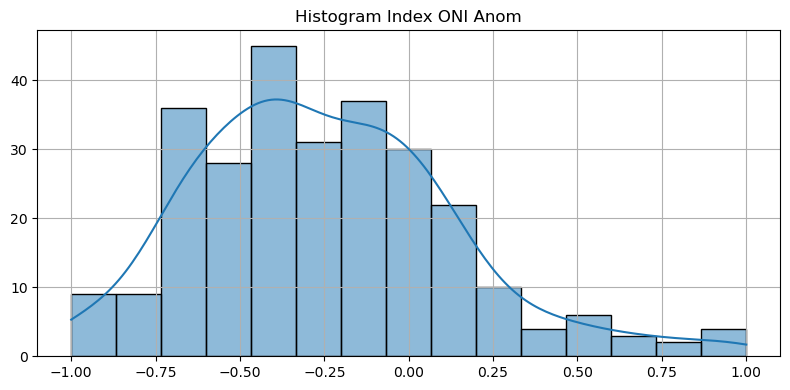

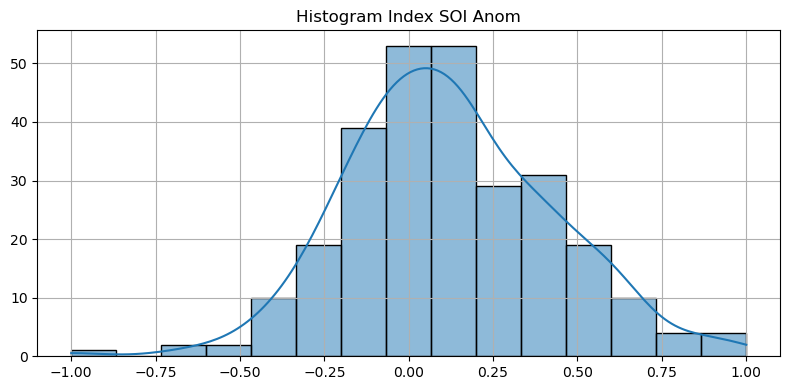

In [18]:
# histogram hotspot
histogram(data=scaled, x="hotspot", title="Histogram Hotspot")
histogram(data=scaled, x="sst_anom", title="Histogram SST Nina 3.4 Anom")
histogram(data=scaled, x="oni_anom", title="Histogram Index ONI Anom")
histogram(data=scaled, x="soi_anom", title="Histogram Index SOI Anom")